In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

# Input data files are available in the "../input/" directory.
from subprocess import check_output
# input_file = "../dataset_/no_imdb_names-count_cat-tf_184f.csv"
input_file = "../dataset_/no_imdb_names-count_cat-tf_184f.csv"

In [2]:
# Importing packages

import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

In [3]:
f = pd.read_csv(input_file)
data=DataFrame(f)
data['worldwide_gross'].replace('0', None, inplace=True)
data.dropna(inplace=True)

target = data['worldwide_gross']
data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('worldwide_gross', axis=1, inplace=True)

print(data.shape)
data.head(10)

(4731, 183)


,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,blockbuster_month,cast_total_facebook_likes,director_facebook_likes,dump_month,duration,production_budget,title_year,...,raiting_notrated,raiting_passed,raiting_pg,raiting_pg13,raiting_r,raiting_tv14,raiting_tvg,raiting_tvma,raiting_tvpg,raiting_unrated
0,1000,942.0,862,1,4859,7000,0,178,425000000,2009.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
1,29000,14000.0,787,1,45239,7000,0,194,200000000,1997.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,3000,3000.0,878,1,8694,367,0,124,215000000,2015.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
3,26000,23000.0,14000,0,79155,0,0,140,190000000,2015.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,26000,21000.0,19000,0,97000,0,0,141,250000000,2015.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
5,10000,577.0,175,1,11064,0,0,130,125000000,2011.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
6,1000,525.0,490,0,2601,69,0,102,150000000,2013.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,21000,3000.0,1000,0,25774,0,0,195,200000000,2013.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
8,7000,4000.0,1000,1,13636,22,0,91,74000000,2015.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,21000,19000.0,11000,0,66820,96,0,147,250000000,2016.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
target.head()

0    2783918982
1    2207615668
2    1671640593
3    1516748684
4    1404705868
Name: worldwide_gross, dtype: int64

In [5]:
### Which features are included in the datset?
[ c for c in data.columns]

['actor_1_facebook_likes',
 'actor_2_facebook_likes',
 'actor_3_facebook_likes',
 'blockbuster_month',
 'cast_total_facebook_likes',
 'director_facebook_likes',
 'dump_month',
 'duration',
 'production_budget',
 'title_year',
 'adamsandler',
 'adamscott',
 'alpacino',
 'angelinajolie',
 'annakendrick',
 'annehathaway',
 'anthonyhopkins',
 'anthonymackie',
 'antonyelchin',
 'billcobbs',
 'billmurray',
 'bobhoskins',
 'bradleycooper',
 'bradpitt',
 'briandepalma',
 'brucegreenwood',
 'brucemcgill',
 'brucewillis',
 'catherineohara',
 'channingtatum',
 'charlesdance',
 'chazzpalminteri',
 'cheechmarin',
 'chlo',
 'chrisevans',
 'christianbale',
 'cliftoncollinsjr',
 'clinteastwood',
 'colinfirth',
 'dennisquaid',
 'denzelwashington',
 'dianekeaton',
 'djimonhounsou',
 'doncheadle',
 'dwaynejohnson',
 'emmastone',
 'franklangella',
 'garyoldman',
 'gerardbutler',
 'gracemoretz',
 'harrisonford',
 'helenmirren',
 'hughjackman',
 'jadapinkettsmith',
 'jakegyllenhaal',
 'jamesfranco',
 'james

In [6]:
#data['production_budget_log'] = np.log(data['production_budget'])
#data['worldwide_gross_log'] = np.log(data['worldwide_gross'])

In [7]:
#data['worldwide_gross_log'].hist()

In [8]:
#plt.scatter(data['production_budget_log'],data['worldwide_gross_log'])

In [9]:
X=StandardScaler().fit_transform(data)
y=np.array(target)

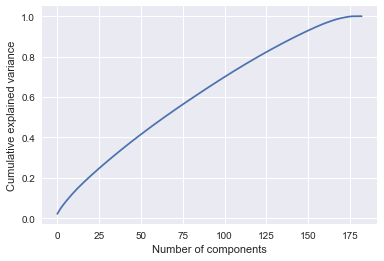

In [10]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlim(0,110,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


In [11]:
# There is negative values in the matrix?
[x for x in X.max(axis=1) ]

[9.8145847495943119,
 14.976171549689001,
 4.581565503084355,
 16.652150541208147,
 12.733339351265352,
 3.0581685393393458,
 2.9618214505931779,
 17.731328207441202,
 16.652150541208147,
 16.181647513079266,
 4.0572867321505282,
 4.0831827177024547,
 4.2077784140479295,
 4.4569698067388801,
 14.630575890652802,
 11.420555460276063,
 11.263430421717217,
 4.2077784140479295,
 11.263430421717217,
 13.452194559310332,
 14.976475475169361,
 12.117910298397163,
 5.4537353775026816,
 13.452194559310328,
 17.166464400102889,
 16.652150541208147,
 3.0581685393393458,
 11.263430421717217,
 5.4537353775026816,
 3.0581685393393458,
 5.4537353775026816,
 3.0581685393393458,
 2.4331151119388847,
 14.630292360218045,
 5.5587579842403425,
 3.0937754528930181,
 5.5587579842403425,
 13.452194559310328,
 3.0455998889301426,
 18.355614166477007,
 6.6996923409574327,
 3.1901265808187693,
 16.652150541208147,
 5.4537353775026816,
 17.731328207441202,
 14.630292360218045,
 3.5847999323205539,
 15.3476382547

In [12]:
# NMF
from sklearn.decomposition import NMF, LatentDirichletAllocation

nmf = NMF(n_components=50, random_state=1, alpha=.1, l1_ratio=.5).fit(data)

column_names = data.columns

#print_top_columns(nmf, column_names, n_top_words)
nmf

NMF(alpha=0.1, beta=1, eta=0.1, init=None, l1_ratio=0.5, max_iter=200,
  n_components=50, nls_max_iter=2000, random_state=1, shuffle=False,
  solver='cd', sparseness=None, tol=0.0001, verbose=0)

In [13]:
for topic_idx, topic in enumerate(nmf.components_):
        print("Topic {}".format(topic_idx))

Topic 0
Topic 1
Topic 2
Topic 3
Topic 4
Topic 5
Topic 6
Topic 7
Topic 8
Topic 9
Topic 10
Topic 11
Topic 12
Topic 13
Topic 14
Topic 15
Topic 16
Topic 17
Topic 18
Topic 19
Topic 20
Topic 21
Topic 22
Topic 23
Topic 24
Topic 25
Topic 26
Topic 27
Topic 28
Topic 29
Topic 30
Topic 31
Topic 32
Topic 33
Topic 34
Topic 35
Topic 36
Topic 37
Topic 38
Topic 39
Topic 40
Topic 41
Topic 42
Topic 43
Topic 44
Topic 45
Topic 46
Topic 47
Topic 48
Topic 49
